In [1]:
# Import necessary libraries
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize BigQuery client
client = bigquery.Client()

# 1:  Distribution of excess readmission ratios

DataFrame shape: (7890, 12)
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   facility_name               7890 non-null   object 
 1   facility_id                 7890 non-null   Int64  
 2   state                       7890 non-null   object 
 3   measure_name                7890 non-null   object 
 4   number_of_discharges        7890 non-null   Int64  
 5   footnote                    0 non-null      object 
 6   excess_readmission_ratio    7890 non-null   float64
 7   predicted_readmission_rate  7890 non-null   float64
 8   expected_readmission_rate   7890 non-null   float64
 9   number_of_readmissions      7890 non-null   Int64  
 10  start_date                  7890 non-null   dbdate 
 11  end_date                    7890 non-null   dbdate 
dtypes: Int64(3), dbdate(2), float64(3), object(4)


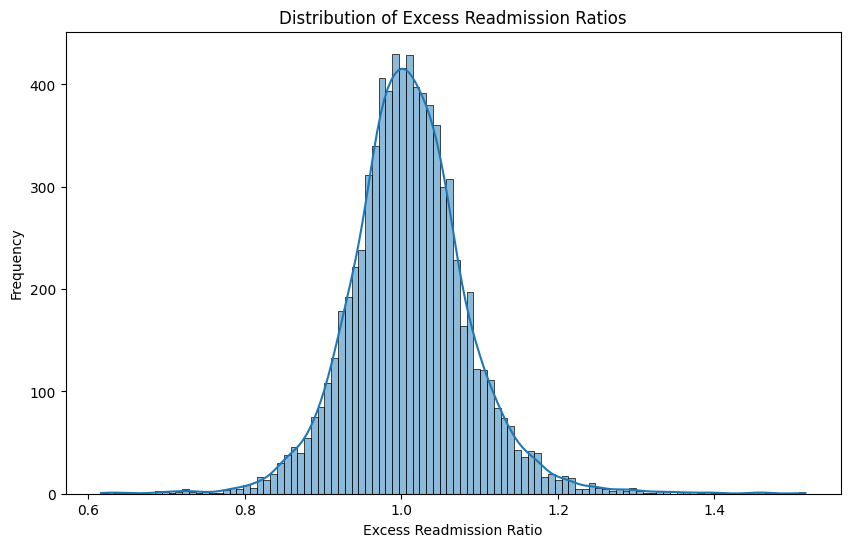

In [4]:
# Load the data into a DataFrame
query = """
SELECT *
FROM `named-vine-254515.processed_data.us_hospital_readmissions_partitioned`;
"""
df = client.query(query).to_dataframe()

# Display the first few rows of the DataFrame
df.head()

# Basic data exploration
print("DataFrame shape:", df.shape)
print("DataFrame info:")
print(df.info())

# Descriptive statistics
df.describe()

# Distribution of excess readmission ratios
plt.figure(figsize=(10, 6))
sns.histplot(df['excess_readmission_ratio'], kde=True)
plt.title('Distribution of Excess Readmission Ratios')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Frequency')
plt.show()

# 2: Average readmission ratio by state

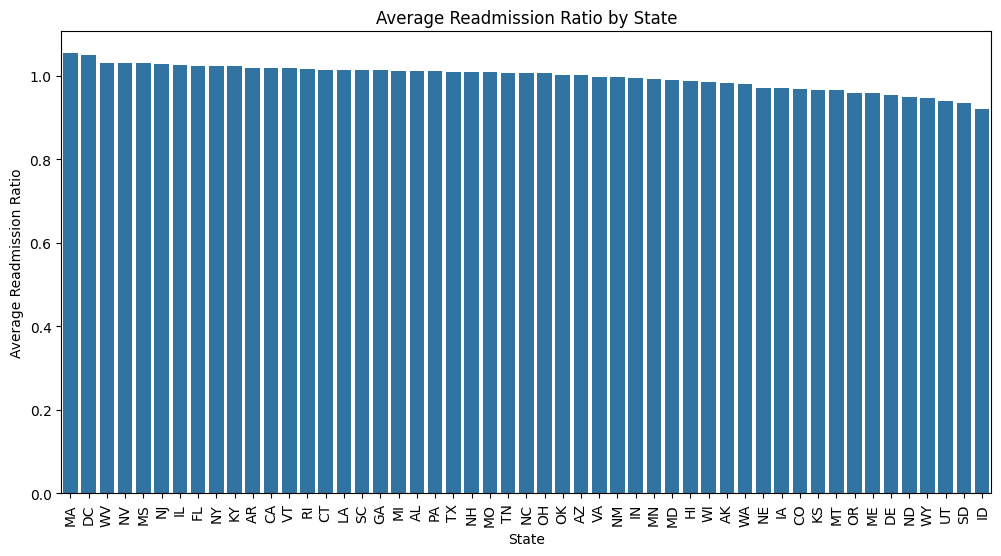

In [5]:
# Average readmission ratio by state
query_state = """
SELECT
    state,
    AVG(excess_readmission_ratio) AS avg_readmission_ratio
FROM
    `named-vine-254515.processed_data.us_hospital_readmissions_partitioned`
GROUP BY
    state
ORDER BY
    avg_readmission_ratio DESC;
"""
df_state = client.query(query_state).to_dataframe()

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='avg_readmission_ratio', data=df_state)
plt.title('Average Readmission Ratio by State')
plt.xlabel('State')
plt.ylabel('Average Readmission Ratio')
plt.xticks(rotation=90)
plt.show()